In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
models = pd.read_csv("small_DT_RF_LR_GB_B.csv")
models.sort_values('p_at_10', ascending = False)[['clf', 'parameters', 'p_at_10']].head()

,clf,parameters,p_at_10
462,"LogisticRegression(C=10, class_weight=None, du...","{'C': 0.1, 'penalty': 'l1'}",0.556962
112,"LogisticRegression(C=10, class_weight=None, du...","{'C': 0.1, 'penalty': 'l1'}",0.556962
0,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.544304
113,"LogisticRegression(C=10, class_weight=None, du...","{'C': 0.1, 'penalty': 'l2'}",0.544304
57,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 1, 'max_...",0.544304


In [7]:
summary = pd.pivot_table(models,
                         index=['model_type', 'split_date'],
                         aggfunc='max',
                         fill_value=0)
f1_list = ['f1_at_1', 'f1_at_2', 'f1_at_5',
           'f1_at_10', 'f1_at_20', 'f1_at_30', 'f1_at_50']
p_list = ['p_at_1', 'p_at_2', 'p_at_5', 
          'p_at_10', 'p_at_20', 'p_at_30', 'p_at_50']
recall_list = ['recall_at_1', 'recall_at_2', 'recall_at_5', 
               'recall_at_10', 'recall_at_20', 'recall_at_30', 'recall_at_50']

# Checking precision over time for each classifier

In [16]:
precision_summary = summary.reset_index()
precision_summary[['model_type', 'clf', 'split_date', 'p_at_10']]

,model_type,clf,split_date,p_at_10
0,B,"BaggingClassifier(base_estimator=None, bootstr...",2013-01-01,0.455696
1,B,"BaggingClassifier(base_estimator=None, bootstr...",2014-01-01,0.417722
2,B,"BaggingClassifier(base_estimator=None, bootstr...",2015-01-01,0.443038
3,DT,"DecisionTreeClassifier(class_weight=None, crit...",2013-01-01,0.544304
4,DT,"DecisionTreeClassifier(class_weight=None, crit...",2014-01-01,0.468354
5,DT,"DecisionTreeClassifier(class_weight=None, crit...",2015-01-01,0.544304
6,GB,GradientBoostingClassifier(criterion='friedman...,2013-01-01,0.506329
7,GB,GradientBoostingClassifier(criterion='friedman...,2014-01-01,0.468354
8,GB,GradientBoostingClassifier(criterion='friedman...,2015-01-01,0.544304
9,LR,"LogisticRegression(C=10, class_weight=None, du...",2013-01-01,0.556962


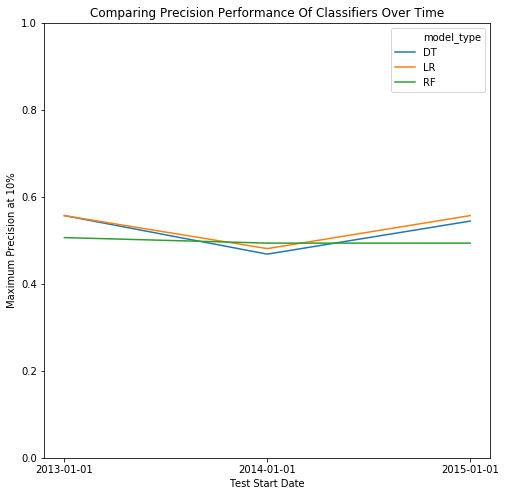

In [58]:
plt.figure(figsize=(8,8))
sns.lineplot(x="split_date", y="p_at_10", hue="model_type",
                data=precision_summary)
plt.ylim(0, 1)
plt.xlabel("Test Start Date")
plt.ylabel("Maximum Precision at 10%")
plt.title("Comparing Precision Performance Of Classifiers Over Time")
plt.show()

In [56]:
summary[p_list].sort_values(by='p_at_10', ascending=False)

p_at_1    p_at_2    p_at_5   p_at_10   p_at_20  \
model_type split_date                                                     
DT         2013-01-01  1.000000  0.733333  0.666667  0.556962  0.335443   
LR         2013-01-01  0.857143  0.800000  0.666667  0.556962  0.379747   
           2015-01-01  0.857143  0.800000  0.692308  0.556962  0.389937   
DT         2015-01-01  1.000000  0.666667  0.615385  0.544304  0.352201   
RF         2013-01-01  0.857143  0.800000  0.589744  0.506329  0.386076   
           2014-01-01  1.000000  0.800000  0.589744  0.493671  0.352201   
           2015-01-01  0.857143  0.800000  0.564103  0.493671  0.377358   
LR         2014-01-01  0.857143  0.800000  0.538462  0.481013  0.352201   
DT         2014-01-01  1.000000  0.733333  0.564103  0.468354  0.345912   

                        p_at_30   p_at_50  
model_type split_date                      
DT         2013-01-01  0.302521  0.201511  
LR         2013-01-01  0.298319  0.198992  
           2015-01-01  0.302521  0.201005  
DT         2015-01-01  0.294118  0.201005  
RF         2013-01-01  0.315126  0.198992  
           2014-01-01  0.315126  0.201005  
           2015-01-01  0.310924  0.198492  
LR         2014-01-01  0.298319  0.201005  
DT         2014-01-01  0.315126  0.201005

# Checking recall over time for each classifier

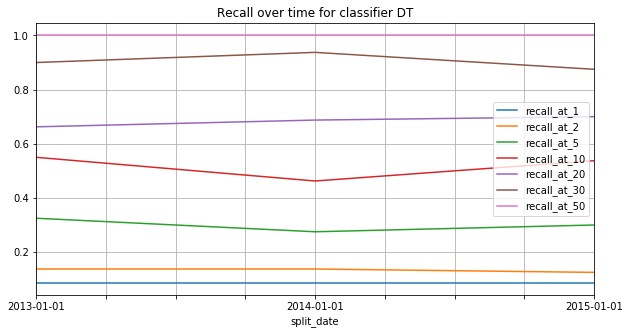

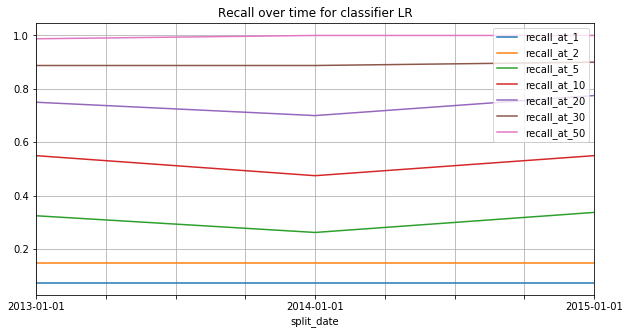

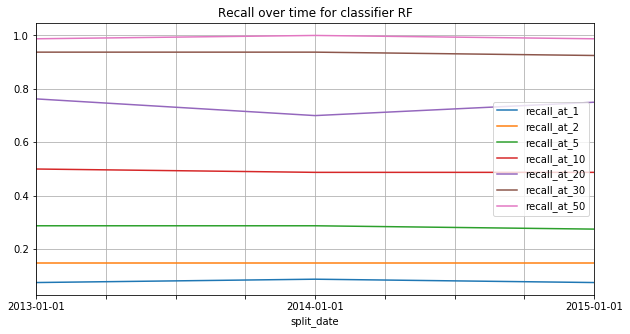

In [55]:
m = 0
n = 3
while n < 10:
    df = summary[recall_list].reset_index().iloc[m:n]
    df.set_index('split_date').plot(figsize = (10,5), 
                                grid = True, 
                                title = "Recall over time for classifier {}".format(df['model_type'].iloc[0]))
    plt.show()
    m += 3
    n += 3

In [12]:
summary[recall_list].sort_values(by='recall_at_10', ascending=False)

recall_at_1  recall_at_2  recall_at_5  recall_at_10  \
model_type split_date                                                        
DT         2013-01-01       0.0875       0.1375       0.3250        0.5500   
LR         2013-01-01       0.0750       0.1500       0.3250        0.5500   
           2015-01-01       0.0750       0.1500       0.3375        0.5500   
DT         2015-01-01       0.0875       0.1250       0.3000        0.5375   
RF         2013-01-01       0.0750       0.1500       0.2875        0.5000   
           2014-01-01       0.0875       0.1500       0.2875        0.4875   
           2015-01-01       0.0750       0.1500       0.2750        0.4875   
LR         2014-01-01       0.0750       0.1500       0.2625        0.4750   
DT         2014-01-01       0.0875       0.1375       0.2750        0.4625   

                       recall_at_20  recall_at_30  recall_at_50  
model_type split_date                                            
DT         2013-01-01        0.6625        0.9000        1.0000  
LR         2013-01-01        0.7500        0.8875        0.9875  
           2015-01-01        0.7750        0.9000        1.0000  
DT         2015-01-01        0.7000        0.8750        1.0000  
RF         2013-01-01        0.7625        0.9375        0.9875  
           2014-01-01        0.7000        0.9375        1.0000  
           2015-01-01        0.7500        0.9250        0.9875  
LR         2014-01-01        0.7000        0.8875        1.0000  
DT         2014-01-01        0.6875        0.9375        1.0000

# Ranking models based on f1 score at k=10%

In [10]:
summary[f1_list].sort_values(by='f1_at_10',ascending=False)

f1_at_1   f1_at_2   f1_at_5  f1_at_10  f1_at_20  \
model_type split_date                                                     
DT         2013-01-01  0.160920  0.231579  0.436975  0.553459  0.445378   
LR         2013-01-01  0.137931  0.252632  0.436975  0.553459  0.504202   
           2015-01-01  0.137931  0.252632  0.453782  0.553459  0.518828   
DT         2015-01-01  0.160920  0.210526  0.403361  0.540881  0.468619   
RF         2013-01-01  0.137931  0.252632  0.386555  0.503145  0.512605   
           2014-01-01  0.160920  0.252632  0.386555  0.490566  0.468619   
           2015-01-01  0.137931  0.252632  0.369748  0.490566  0.502092   
LR         2014-01-01  0.137931  0.252632  0.352941  0.477987  0.468619   
DT         2014-01-01  0.160920  0.231579  0.369748  0.465409  0.460251   

                       f1_at_30  f1_at_50  
model_type split_date                      
DT         2013-01-01  0.452830  0.335430  
LR         2013-01-01  0.446541  0.331237  
           2015-01-01  0.452830  0.334728  
DT         2015-01-01  0.440252  0.334728  
RF         2013-01-01  0.471698  0.331237  
           2014-01-01  0.471698  0.334728  
           2015-01-01  0.465409  0.330544  
LR         2014-01-01  0.446541  0.334728  
DT         2014-01-01  0.471698  0.334728

# Best model in terms of F1 score

In [27]:
metric = 'f1_at_10'
highest_f1 = models[models[metric] == models[metric].max()]
highest_f1

,Unnamed: 0,model_type,clf,parameters,split_date,min_year_in_train,max_year_in_train,min_year_in_test,max_year_in_test,baseline,...,p_at_20,recall_at_20,f1_at_20,p_at_30,recall_at_30,f1_at_30,p_at_50,recall_at_50,f1_at_50,auc-roc
13,13,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 5, 'max_fea...",2013-01-01,2010-01-01,2012-01-01,2013-01-01,2013-01-01,0.100756,...,0.322785,0.6375,0.428571,0.302521,0.9000,0.452830,0.201511,1.0000,0.335430,0.893522
112,112,LR,"LogisticRegression(C=10, class_weight=None, du...","{'C': 0.1, 'penalty': 'l1'}",2013-01-01,2010-01-01,2012-01-01,2013-01-01,2013-01-01,0.100756,...,0.379747,0.7500,0.504202,0.298319,0.8875,0.446541,0.196474,0.9750,0.327044,0.906434
380,380,LR,"LogisticRegression(C=10, class_weight=None, du...","{'C': 0.1, 'penalty': 'l1'}",2015-01-01,2010-01-01,2014-01-01,2015-01-01,2015-01-01,0.100503,...,0.389937,0.7750,0.518828,0.302521,0.9000,0.452830,0.198492,0.9875,0.330544,0.912439


In [28]:
highest_f1['parameters'].values

array(["{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5}",
       "{'C': 0.1, 'penalty': 'l1'}", "{'C': 0.1, 'penalty': 'l1'}"],
      dtype=object)

# Best model in terms of auc-roc score

In [30]:
metric_auc = 'auc-roc'
highest_auc = models[models[metric_auc] == models[metric_auc].max()]
highest_auc

,Unnamed: 0,model_type,clf,parameters,split_date,min_year_in_train,max_year_in_train,min_year_in_test,max_year_in_test,baseline,...,p_at_20,recall_at_20,f1_at_20,p_at_30,recall_at_30,f1_at_30,p_at_50,recall_at_50,f1_at_50,auc-roc
380,380,LR,"LogisticRegression(C=10, class_weight=None, du...","{'C': 0.1, 'penalty': 'l1'}",2015-01-01,2010-01-01,2014-01-01,2015-01-01,2015-01-01,0.100503,...,0.389937,0.775,0.518828,0.302521,0.9,0.45283,0.198492,0.9875,0.330544,0.912439


In [31]:
highest_auc['parameters'].values

array(["{'C': 0.1, 'penalty': 'l1'}"], dtype=object)